# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais<br> Exercícios</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs.csv</font> disponível no _moodle_.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


### Exercício 1)
Calcule as direções principais do conjunto de dados armazenado na variável X definida no código abaixo. Imprima as 3 direções principais com maior variância.

In [113]:
X = pd.read_csv('blobs.csv').values
print(X.shape)
X


(500, 25)


array([[  3.5026708 ,  -5.63831164,   7.60230719, ...,  -9.89075569,
         -4.34843495,  -2.61391916],
       [  4.39088303,  -2.60805681,   3.63916569, ...,   9.06250443,
          2.2620999 ,  -1.30843859],
       [ -8.55636771,  -4.42000769,  -9.04887885, ..., -10.26211956,
          5.43162455,  -8.79717075],
       ...,
       [  1.65935139,   0.32048765,  11.14855586, ...,   8.67603827,
          3.24300446,   4.43383576],
       [  2.20814697,   0.31312644,  11.67622952, ...,  12.11266488,
          3.81058997,   4.29179988],
       [  0.742847  ,   5.16353264,   2.42154806, ...,  -1.07651259,
          6.51252434,  -6.80213272]])

In [126]:
data_pca=PCA(svd_solver='full')
data_transf=data_pca.fit(X)

print('\nTres direcoes com maior variancia\n')
print(data_transf.components_[0:3])


Tres direcoes com maior variancia

[[ 1.92197646e-02 -2.06435693e-02  2.03149133e-02  2.85215074e-02
  -9.90931578e-03  6.80511220e-04  1.11433172e-02 -6.95451279e-03
  -9.92677418e-01  3.67757946e-02 -1.85597158e-02  1.95100212e-02
   1.83684280e-02 -4.39279974e-02  2.90013592e-02  1.70472900e-02
   5.19817429e-02 -1.05752911e-02  1.55291901e-02 -7.74234160e-03
   3.98920576e-03 -1.37186521e-02  5.08262800e-02 -8.95014464e-03
   2.89781030e-02]
 [ 1.79461688e-01  1.01948228e-01  1.16622674e-01  1.94845330e-01
   1.55385732e-01  1.62598385e-01  9.51584471e-03  3.46145642e-01
  -4.89428134e-02 -8.16320250e-02  3.00809995e-01  1.32208382e-01
   1.42191888e-01  3.14145675e-01 -1.88654700e-01 -9.56956086e-02
  -3.32721341e-01  3.93560366e-01 -1.26123633e-01  3.48592275e-01
   1.98752815e-01  4.19471732e-02 -4.46140845e-02 -5.39292086e-02
  -7.40742427e-02]
 [-2.39084918e-01 -7.29413297e-02 -3.58568151e-01  2.96299394e-02
  -1.51125110e-02  3.43591444e-02 -8.80850946e-02 -8.82816898e-02
  

### Exercício 2)
Faça um gráfico mostrando o decaimento no valor das variâncias. Faça um segundo gráfico mostrando o decaimento no valor da proporção de variância explicada por cada direção principal.

**Dica**: Utilize os atributos "explained_variance_" e "explained_variance_ratio_". Veja [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para entender claramente a diferença entre tais atributos.

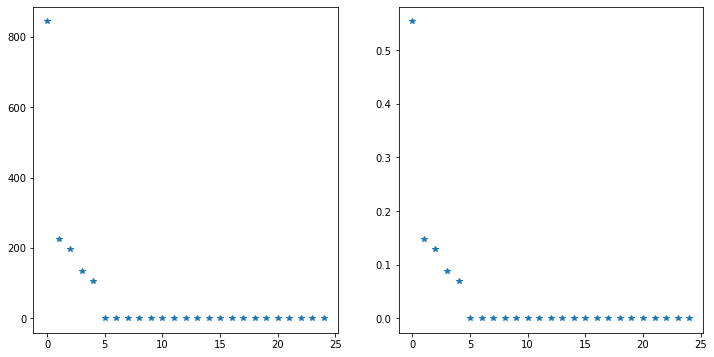

In [52]:
plt.rcParams['figure.figsize'] = [12, 6]
f, (ax1, ax2)  = plt.subplots(1,2)

ax1.plot(data_transf.explained_variance_, '*')
ax2.plot(data_transf.explained_variance_ratio_, '*') 

### Exercício 3)
Calcule quantas direções principais são necessárias para representar $80\%$ da variância contida nos dados.

In [155]:
# O atributo "explained_variance_ratio_" contém a porcentagem de
# informação representada em cada direção (ordenado da maior para a menor)
# Para encontrar o número de direções necessárias para representar
# 80% da informação basta somar os valores de "explained_variance_ratio_"
# até que se obtenha 80%

percentage_info = data_transf.explained_variance_ratio_

sum_var = 0
for i in range(percentage_info.shape[0]):
    sum_var += round(percentage_info[i]*100,2)
    if sum_var >= 80:
        n_comp = i+1
        break

print('Número de Componentes :', n_comp)
print('Porcentagem da Informação :', sum_var, '%')

Número de Componentes : 3
Porcentagem da Informação : 83.07000000000001 %


### Exercício 4)
Utilizando apenas as duas componentes com maior variância, projete os dados originais nestas duas componentes e faça um "scatter plot" dos dados em duas dimensões.

(500, 2)


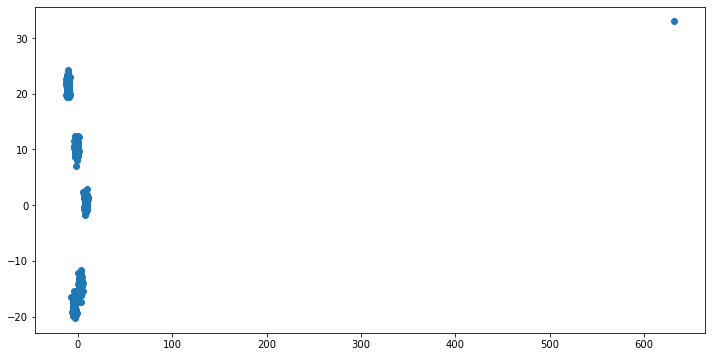

In [156]:
data_pca = PCA(n_components=2)
data_2 = data_pca.fit_transform(X)

print(data_2.shape)

plt.scatter(data_2[:,0],data_2[:,1])


### Exercício 5)
Analisando o "scatter plot" do exercício anterior você deve ter notado que existem _outliers_ nos dados originais (pontos muito distantes dos demais). Encontre os _outliers_ e remova-os dos dados originais.

In [157]:
def remove_outliers_IQR(df, attributes, factor=1.5):
    """Funcao para remover outliers com base no IQR
    Parametros:
        - df : dataframe
        - attributes: atributos a considerar na remoção
        - factor: fator do IQR a considerar
    Retorno:
        dataframe com os outliers removidos
    """
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = dfn[var].quantile(0.25)
            #Q2 = dfn[var].quantile(0.50)
            Q3 = dfn[var].quantile(0.75)
            IQR = Q3 - Q1
            
            # apenas inliers segundo IQR
            dfn = dfn.loc[(df[var] >= Q1-(IQR*factor)) & (df[var] <= Q3+(IQR*factor)),:]

    return dfn

In [158]:
df = pd.DataFrame(data=X)

print('Shape dos dados originais :', df.shape)

df = remove_outliers_IQR(df, df.columns, factor = 1.5)

print('Shape dos dados sem outliers :', df.shape)


Shape dos dados originais : (500, 25)
Shape dos dados sem outliers : (399, 25)


### Exercício 6)
Um dos problemas de PCA é sua sensibilidade à outliers, isto é, outliers interferem muito no cálculo das direções principais. Recalcule as direções principais dos dados cujos outliers foram removidos e verifique o quanto a direção principal de maior variância mudou.

**DICA**: utilize o ângulo entre as direções principais com e sem outliers para medir a mudança nas direções.

In [160]:
pca_obj2=PCA(svd_solver='full')
df_transformed = pca_obj2.fit(df)

# Calculando o ângulo entre as direções principais com e 
# sem outliers: cos(angulo) = np.dot(v1,v2)/(np.norm(v1)*np.norm(v2))
# angulo = arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

v1 = data_transf.components_[0] # direcao principal de maior variancia com outliers
v2 = df_transformed.components_[0] # direcao principal de maior variancia sem outliers

cos_comp = np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))               
ang = np.arccos(cos_comp)
print(ang)
print('angulo de ',ang*180/3.1415,' graus entre direcoes principais')

1.2431867627010416
angulo de  71.23145544682077  graus entre direcoes principais


### Exercício 7)
Compare visualmente o decaimento da proporção de variância explicada com e sem outliers (valores do atributo "explained_variance_ratio_"). 

### Exercício 8)
Qual a proporção de variância explicada pelas 4 primeiras componentes principais após a remoção dos outliers?

### Exercício 9)
Repita o exercício 4), utilizando os dados sem outliers, ou seja, projete os dados sem outliers nas duas primeiras direções principais e faça um scatter plot.

Os clusters contidos nos dados devem ser claramente visíveis após a remoção dos outliers.